In [2]:
# load data
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

data = genfromtxt('../dataset/house_price_data.csv', delimiter=',')
areas = data[1:,0]
prices = data[1:,1:]
data_size = areas.size

# vector [x, b]
data = np.c_[areas, np.ones((data_size, 1))]
data = data.T

# init weight
eta = 0.01
theta = np.array([[-0.34],[0.04]]) # [w, b]

# how long
epoch_max = 10

# mini-batch size
m = 2

In [3]:
losses = [] # for debug
for epoch in range(epoch_max):
    gradients = np.zeros((2,1))

    for i in range(0, data_size, m):
        # get m samples
        x = data[:, i:i+m]
        y = prices[i:i+m,:]

        # predict z/o
        z = theta.T.dot(x)

        # compute loss
        loss = np.multiply((z-y.T), (z-y.T))
        losses.append(np.mean(loss))

        # compute gradient
        b = 2*(z-y.T)
        gradient = np.multiply(x, np.vstack((b, b)))
        gradient = gradient.dot(np.ones((m,1)))/m

        # update weights
        theta = theta - eta*gradient


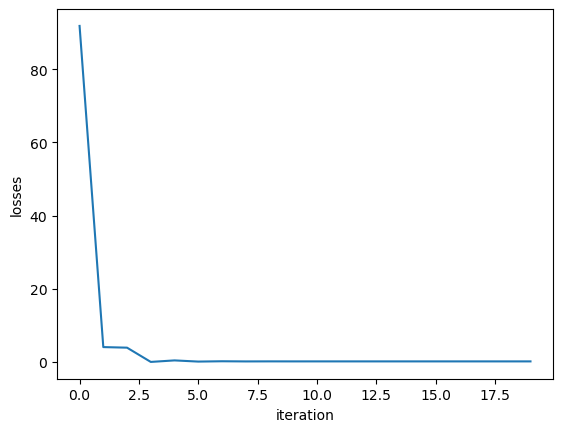

In [4]:
plt.plot(losses)
plt.xlabel('iteration')
plt.ylabel('losses')
plt.show()